# Business Case



#### FicZon Inc is an IT solution provider with products ranging from on-premises products to SAAS based solutions. FicZon major leads generation channel is digital and through their website.
#### FicZon business is majorly dependent on the sales force effectiveness. As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales.
#### Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff. Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation.
#### FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.



# PROJECT GOAL: 
#### 1. Data exploration insights – Sales effectiveness.
#### 2. ML model to predict the Lead Category (High Potential , Low Potential)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv('client_data.csv', encoding_errors='replace', on_bad_lines='skip')
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


# Domain Analysis

# Basic Checks

In [14]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7405 non-null   object 
 3   Mobile         5612 non-null   object 
 4   EMAIL          7421 non-null   object 
 5   Sales_Agent    7398 non-null   object 
 6   Location       7363 non-null   object 
 7   Delivery_Mode  7421 non-null   object 
 8   Status         7421 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB


In [17]:
data.isnull().sum()

Created             0
Product_ID         58
Source             17
Mobile           1810
EMAIL               1
Sales_Agent        24
Location           59
Delivery_Mode       1
Status              1
dtype: int64

In [4]:
data.rename(columns={'EMAIL':'Email'}, inplace=True)
data

,Created,Product_ID,Source,Mobile,Email,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [5]:
data_num = data.select_dtypes(exclude='O')
data_num

,Product_ID
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
7417,9.0
7418,15.0
7419,5.0
7420,21.0


In [6]:
data_num.describe()

,Product_ID
count,7364.000000
mean,15.947311
std,6.072937
min,0.000000
25%,12.000000
50%,18.000000
75%,19.000000
max,28.000000


In [7]:
data_cat = data.select_dtypes(include='O')
data_cat

,Created,Source,Mobile,Email,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [8]:
data_cat.describe()

,Created,Source,Mobile,Email,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7405,5612,7421,7398,7363,7421,7421
unique,6752,25,486,882,12,17,5,11
top,26-09-2018 11:30,Call,XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,2547,222,1701,1500,2500,2975,1536


In [24]:
data.shape

(7422, 9)

In [ ]:
Insights:
    There are 7422 rows and 9 columns.
    There is only one numerical variable and rest are categorical variables.
    The maximum product id is 28, hence there would be 28 varieties of products.
    The maximum lead generation has been done through telephonic calls.
    The sales agent 4 has done the maximum contributions.
    The top used delivery mode id Mode 5.
    The status of most of the products are junk lead.

In [11]:
data.Created.value_counts()

26-09-2018 11:30    4
27-09-2018 11:00    4
10-05-2018 12:30    4
15-10-2018 10:36    4
14-09-2018 12:00    4
                   ..
29-08-2018 12:52    1
29-08-2018 13:08    1
29-08-2018 15:26    1
29-08-2018 15:39    1
28-04-2018 07:54    1
Name: Created, Length: 6752, dtype: int64

In [10]:
data.Product_ID.value_counts()

18.0    1711
15.0    1518
19.0    1189
9.0      992
27.0     739
5.0      487
10.0     168
1.0      105
20.0     102
25.0      90
21.0      66
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
3.0        7
17.0       7
6.0        7
8.0        6
13.0       5
24.0       3
16.0       3
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: Product_ID, dtype: int64

In [5]:
# Droping the variables that are not relevant in the analysis
# The variables 'created', 'Mobile', 'Email' are unique for every customer hence we remove these varaibles.
data.drop(['Created','Mobile','Email'],axis=1, inplace=True)
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
2,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
3,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
4,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...
7417,9.0,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,15.0,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,5.0,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,21.0,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [20]:
data.Source.value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source, dtype: int64

In [19]:
data.Sales_Agent.value_counts()

Sales-Agent-4     1500
Sales-Agent-11    1419
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

In [21]:
data.Location.value_counts()

Other Locations    2500
Bangalore          2084
Chennai             908
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [22]:
data.Delivery_Mode.value_counts()

Mode-5    2975
Mode-1    2626
Mode-3    1688
Mode-4     121
Mode-2      11
Name: Delivery_Mode, dtype: int64

In [23]:
data.Status.value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                707
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: Status, dtype: int64

In [24]:
# Handling the missing values
data.isnull().sum()

Product_ID       58
Source           17
Sales_Agent      24
Location         59
Delivery_Mode     1
Status            1
dtype: int64

In [25]:
data['Product_ID'].median()

18.0

In [6]:
data.Product_ID = data.Product_ID.fillna(data['Product_ID'].median())

In [42]:
data['Source'].mode()

0    Call
Name: Source, dtype: object

In [7]:
data['Source']= data['Source'].fillna('Call')

In [31]:
data.Sales_Agent.mode()

0    Sales-Agent-4
Name: Sales_Agent, dtype: object

In [8]:
data.Sales_Agent=data.Sales_Agent.fillna('Sales-Agent-4')

In [33]:
data.Location.mode()

0    Other Locations
Name: Location, dtype: object

In [9]:
data.Location=data.Location.fillna('Other Locations')

In [52]:
data.Delivery_Mode.mode()

0    Mode-5
Name: Delivery_Mode, dtype: object

In [10]:
data.Delivery_Mode=data.Delivery_Mode.fillna('Mode-5')

In [37]:
data.Status.mode()

0    Junk Lead
Name: Status, dtype: object

In [11]:
data.Status=data.Status.fillna('Junk Lead')

In [102]:
data.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [12]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,18.0,Website,Sales-Agent-11,Other Locations,Mode-5,Open
1,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,Open
2,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,Open
3,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,Open
4,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,Open
...,...,...,...,...,...,...
7417,9.0,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,15.0,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,5.0,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,21.0,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [57]:
data.Source.unique()

array(['Website', 'Call', 'Live Chat-Google Organic', 'Live Chat-Direct',
       'By Recommendation', 'Customer Referral', 'Live Chat-Blog',
       'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [13]:
# We can combine the features in the source variable in order to reduce the count.
data.Source.replace(['Live Chat-Google Organic', 'Live Chat-Direct', 'Live Chat-Blog', 'Live Chat -PPC',
                    'Live Chat-Google Ads', 'Live Chat-Adwords Remarketing', 'Live Chat-CPC', 'Live Chat-Quora',
                    'Live Chat-Youtube', 'Live Chat-Justdial'], 'Live Chat', inplace=True)
data.Source.replace(['US Website', 'Just Dial'], 'Website', inplace=True)
data.Source.replace('By Recommendation', 'Customer Referral', inplace=True)
data.Source.replace(['E-Mail Message', 'E-mail Campaign','SMS Campaign', 'Other'], 'Campaign', inplace=True)
data.Source.replace(['Existing Client', 'CRM form', 'Personal Contact'], 'Existing Customer', inplace=True)

In [58]:
data.Sales_Agent.unique()

array(['Sales-Agent-11', 'Sales-Agent-10', 'Sales-Agent-3',
       'Sales-Agent-4', 'Sales-Agent-9', 'Sales-Agent-7', 'Sales-Agent-8',
       'Sales-Agent-5', 'Sales-Agent-2', 'Sales-Agent-12',
       'Sales-Agent-1', 'Sales-Agent-6'], dtype=object)

In [59]:
data.Location.unique()

array(['Other Locations', 'Bangalore', 'UAE', 'Trivandrum', 'Hyderabad',
       'Chennai', 'UK', 'USA', 'Delhi', 'Mumbai', 'Kolkata', 'Singapore',
       'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'], dtype=object)

In [60]:
data.Delivery_Mode.unique()

array(['Mode-5', 'Mode-1', 'Mode-3', 'Mode-2', 'Mode-4'], dtype=object)

In [61]:
data.Status.unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

In [14]:
data.Status.replace(['Open', 'Potential', 'In Progress Positive', 'CONVERTED', 'Long Term', 'converted'], 
                    'High Potential', inplace=True)
data.Status.replace(['Not Responding', 'Just Enquiry', 'Junk Lead', 'In Progress Negative', 'LOST'],
                    'Low Potential', inplace=True)

In [15]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,18.0,Website,Sales-Agent-11,Other Locations,Mode-5,High Potential
1,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,High Potential
2,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,High Potential
3,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,High Potential
4,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,High Potential
...,...,...,...,...,...,...
7417,9.0,Call,Sales-Agent-6,Mumbai,Mode-4,Low Potential
7418,15.0,Call,Sales-Agent-12,Other Locations,Mode-5,Low Potential
7419,5.0,Live Chat,Sales-Agent-11,Bangalore,Mode-1,Low Potential
7420,21.0,Existing Customer,Sales-Agent-4,Other Locations,Mode-1,Low Potential


# Exploratory Data Analysis

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Website'),
  Text(1, 0, 'Call'),
  Text(2, 0, 'Live Chat'),
  Text(3, 0, 'Customer Referral'),
  Text(4, 0, 'Campaign'),
  Text(5, 0, 'Existing Customer')])

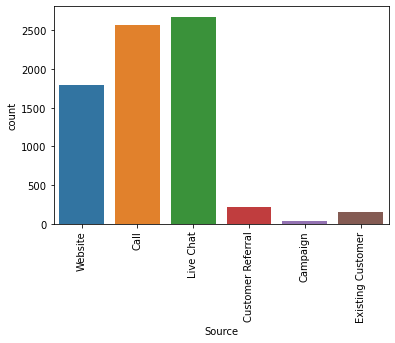

In [16]:
sns.countplot(x=data.Source)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Sales-Agent-11'),
  Text(1, 0, 'Sales-Agent-10'),
  Text(2, 0, 'Sales-Agent-3'),
  Text(3, 0, 'Sales-Agent-4'),
  Text(4, 0, 'Sales-Agent-9'),
  Text(5, 0, 'Sales-Agent-7'),
  Text(6, 0, 'Sales-Agent-8'),
  Text(7, 0, 'Sales-Agent-5'),
  Text(8, 0, 'Sales-Agent-2'),
  Text(9, 0, 'Sales-Agent-12'),
  Text(10, 0, 'Sales-Agent-1'),
  Text(11, 0, 'Sales-Agent-6')])

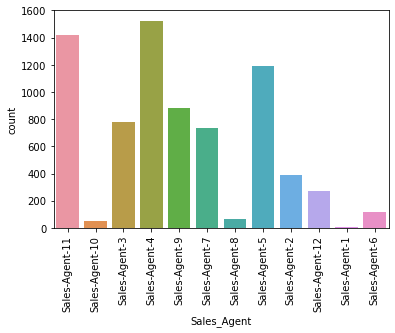

In [17]:
sns.countplot(x=data.Sales_Agent)
plt.xticks(rotation=90)

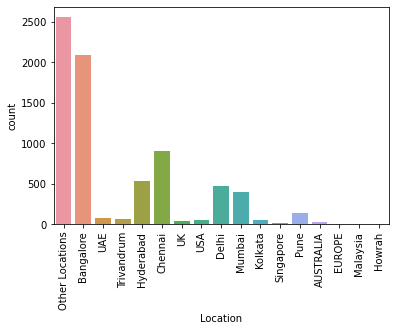

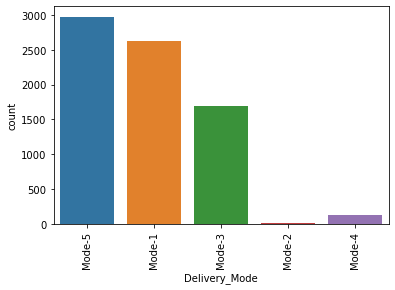

In [18]:
sns.countplot(x=data.Location)
plt.xticks(rotation=90)
plt.show()
sns.countplot(x=data.Delivery_Mode)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Status', ylabel='count'>

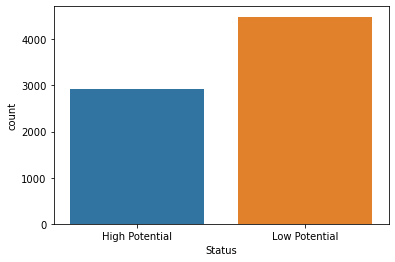

In [19]:
sns.countplot(x=data.Status)

In [114]:
data.Status.value_counts()

Low Potential     4492
High Potential    2930
Name: Status, dtype: int64

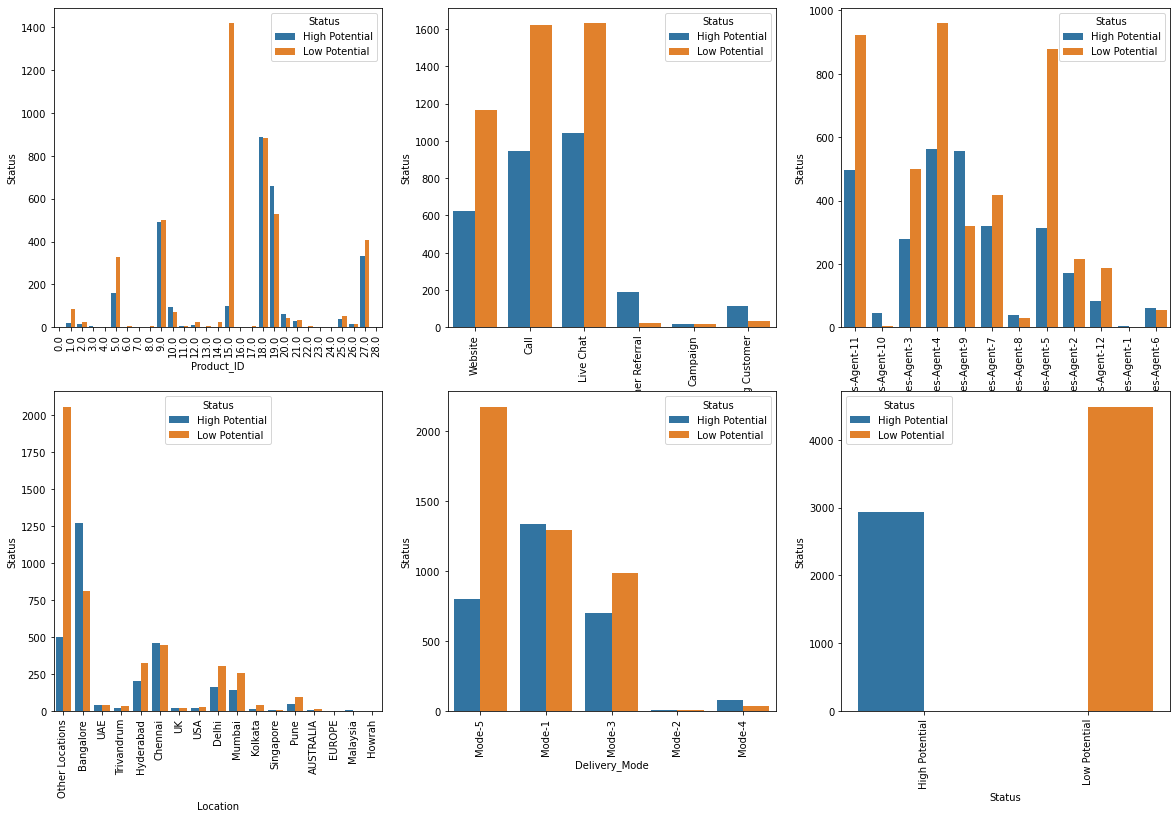

In [20]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1
for column in data:
    if plotnumber<=6:
        ax= plt.subplot(3,3,plotnumber)
        sns.countplot(x=data[column], hue=data.Status)
        plt.xticks(rotation=90)
        plt.xlabel(column)
        plt.ylabel('Status')
    plotnumber+=1
plt.show()

# Data preprocessing

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in (0,1,2,3,4,5):
    data.iloc[:,i]= le.fit_transform(data.iloc[:,i])

In [19]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,18,5,2,10,4,0
1,18,5,1,10,4,0
2,18,5,1,10,4,0
3,18,5,1,10,4,0
4,18,5,1,10,4,0
...,...,...,...,...,...,...
7417,9,0,8,9,3,1
7418,15,0,3,10,4,1
7419,5,4,2,1,0,1
7420,21,3,6,10,0,1


# Model Creation

In [20]:
x= data.drop('Status', axis=1)
y= data.Status

In [132]:
data.Status.value_counts()

1    4492
0    2930
Name: Status, dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 3.36555312e-01,  1.06103069e+00, -1.40407038e+00,
         9.79973938e-01,  1.08716971e+00],
       [ 3.36555312e-01,  1.06103069e+00, -1.75530093e+00,
         9.79973938e-01,  1.08716971e+00],
       [ 3.36555312e-01,  1.06103069e+00, -1.75530093e+00,
         9.79973938e-01,  1.08716971e+00],
       ...,
       [-1.81168998e+00,  5.85747343e-01, -1.40407038e+00,
        -1.12242519e+00, -1.21266600e+00],
       [ 8.32304227e-01,  1.10463996e-01,  8.51812162e-04,
         9.79973938e-01, -1.21266600e+00],
       [ 1.49330278e+00,  1.06103069e+00, -3.50378736e-01,
        -8.88825283e-01, -1.21266600e+00]])

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

In [23]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [24]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [26]:
from collections import Counter
print('Before SMOTE:', Counter(y_train))
print('After SMOTE:', Counter(y_train_smote))

Before SMOTE: Counter({1: 3156, 0: 2039})
After SMOTE: Counter({1: 3156, 0: 3156})


# 1. Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_smote, y_train_smote)
lr_pred = lr.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, roc_auc_score

In [29]:
lr_acc = accuracy_score(y_test, lr_pred)
print(lr_acc)
print(classification_report(y_test, lr_pred))

0.6672653794342165
              precision    recall  f1-score   support

           0       0.57      0.68      0.62       891
           1       0.76      0.66      0.70      1336

    accuracy                           0.67      2227
   macro avg       0.66      0.67      0.66      2227
weighted avg       0.68      0.67      0.67      2227



# 2. Support Vector Machine

In [31]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train_smote, y_train_smote)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(y_test, svc_pred)
print(svc_acc)
print(classification_report(y_test, svc_pred))

0.6825325550067355
              precision    recall  f1-score   support

           0       0.58      0.75      0.65       891
           1       0.79      0.64      0.71      1336

    accuracy                           0.68      2227
   macro avg       0.69      0.69      0.68      2227
weighted avg       0.71      0.68      0.69      2227



# 3. Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_smote, y_train_smote)
rf_pred = rf.predict(x_test)
print(accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

0.699595868881904
              precision    recall  f1-score   support

           0       0.63      0.59      0.61       891
           1       0.74      0.77      0.75      1336

    accuracy                           0.70      2227
   macro avg       0.69      0.68      0.68      2227
weighted avg       0.70      0.70      0.70      2227



# 4. Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_smote, y_train_smote)
dt_pred = dt.predict(x_test)
print(accuracy_score(y_test,dt_pred))
print(classification_report(y_test,dt_pred))

0.690166142792995
              precision    recall  f1-score   support

           0       0.61      0.62      0.62       891
           1       0.74      0.74      0.74      1336

    accuracy                           0.69      2227
   macro avg       0.68      0.68      0.68      2227
weighted avg       0.69      0.69      0.69      2227



# 5. XGBoost Classifier

In [36]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train_smote, y_train_smote)
xgb_pred = xgb.predict(x_test)
print(accuracy_score(y_test,xgb_pred))
print(classification_report(y_test, xgb_pred))

0.7108217332734621
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       891
           1       0.75      0.77      0.76      1336

    accuracy                           0.71      2227
   macro avg       0.70      0.70      0.70      2227
weighted avg       0.71      0.71      0.71      2227



# Hyperparameter Tuning

# 1. SVM

In [38]:
from sklearn.model_selection import GridSearchCV

In [40]:
grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
svc_search = GridSearchCV(estimator=svc,param_grid=grid, cv=5, n_jobs=-1, scoring='accuracy')
svc_search.fit(x_train_smote,y_train_smote)
best_param = svc_search.best_params_
print('Best parameter: ', best_param)

Best parameter:  {'C': 1000, 'gamma': 1}


In [47]:
svc_hp=SVC(C=1000, gamma=1)
svc_hp.fit(x_train_smote, y_train_smote)
y_hat_svc = svc_hp.predict(x_test)
svc_hp_acc= accuracy_score(y_test, y_hat_svc)
print(classification_report(y_test, y_hat_svc))
print(pd.crosstab(y_test, y_hat_svc))

              precision    recall  f1-score   support

           0       0.59      0.65      0.62       891
           1       0.75      0.70      0.73      1336

    accuracy                           0.68      2227
   macro avg       0.67      0.68      0.67      2227
weighted avg       0.69      0.68      0.68      2227

col_0     0    1
Status          
0       581  310
1       397  939


# 2. Decision Tree

In [41]:
params = {"splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],   
    "min_samples_leaf":list(range(1, 20)),}
tree_search = GridSearchCV(estimator=dt, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
tree_search.fit(x_train,y_train)
best_param = tree_search.best_params_
print('Best parameter: ', best_param)

Best parameter:  {'max_depth': 18, 'min_samples_leaf': 11, 'min_samples_split': 3, 'splitter': 'best'}


In [48]:
dt_hp = DecisionTreeClassifier(max_depth=18, min_samples_leaf=11, min_samples_split=3, splitter='best')
dt_hp.fit(x_train_smote, y_train_smote)
y_hat_dt = dt_hp.predict(x_test)
dt_hp_acc= accuracy_score(y_test, y_hat_dt)
print(classification_report(y_test, y_hat_dt))
print(pd.crosstab(y_test, y_hat_dt))

              precision    recall  f1-score   support

           0       0.60      0.61      0.61       891
           1       0.74      0.73      0.73      1336

    accuracy                           0.68      2227
   macro avg       0.67      0.67      0.67      2227
weighted avg       0.68      0.68      0.68      2227

col_0     0    1
Status          
0       546  345
1       364  972


# 3. Random Forest

In [42]:
n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf=[1,2]
bootstrap = [True, False]

grid = {'n_estimators':n_estimators, 
        'max_features':max_features, 
        'max_depth':max_depth, 'min_samples_split':min_samples_split, 
        'min_samples_leaf':min_samples_leaf, 
        'bootstrap':bootstrap}

In [44]:
random_search = GridSearchCV(estimator=rf, param_grid=grid, cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(x_train, y_train)
best_param = random_search.best_params_
print('Best parameter: ', best_param)

Best parameter:  {'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 25}


C:\Users\theertha\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [58]:
rf_hp = RandomForestClassifier(bootstrap=True, max_depth=4, max_features='auto', min_samples_leaf=2, min_samples_split=5, n_estimators=25)
rf_hp.fit(x_train_smote, y_train_smote)
y_hat_rf= rf_hp.predict(x_test)
rf_hp_acc = accuracy_score(y_test, y_hat_rf)
print(rf_hp_acc)
print(classification_report(y_test, y_hat_rf))
print(pd.crosstab(y_test, y_hat_rf))

0.7045352492141895
              precision    recall  f1-score   support

           0       0.61      0.71      0.66       891
           1       0.78      0.70      0.74      1336

    accuracy                           0.70      2227
   macro avg       0.70      0.70      0.70      2227
weighted avg       0.71      0.70      0.71      2227

col_0     0    1
Status          
0       630  261
1       397  939


C:\Users\theertha\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


# 4. XGBoost

In [52]:
max_depth = list(range(1,20))
learning_rate = [1,0.1,0.01,0.001]
min_child_weight = list(range(1,10))
n_estimators = [int(x) for x in np.linspace(start=10, stop=100, num=1)]

grid = {'n_estimators':n_estimators,  
        'max_depth':max_depth, 'min_child_weight':min_child_weight, 
        'learning_rate':learning_rate}

In [53]:
xgb_search = GridSearchCV(estimator=xgb, param_grid=grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_search.fit(x_train_smote, y_train_smote)
best_param = xgb_search.best_params_
print('Best parameter: ', best_param)

Best parameter:  {'learning_rate': 1, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 10}


In [57]:
xgb_hp = XGBClassifier(learning_rate=1, max_depth = 8, min_child_weight=1, n_estimators=10)
xgb_hp.fit(x_train_smote, y_train_smote)
y_hat_xgb= xgb_hp.predict(x_test)
xgb_hp_acc = accuracy_score(y_test, y_hat_xgb)
print(xgb_hp_acc)
print(classification_report(y_test, y_hat_xgb))
print(pd.crosstab(y_test, y_hat_xgb))

0.7081275258194881
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       891
           1       0.75      0.77      0.76      1336

    accuracy                           0.71      2227
   macro avg       0.70      0.69      0.69      2227
weighted avg       0.71      0.71      0.71      2227

col_0     0     1
Status           
0       551   340
1       310  1026


# Model Comparison

In [63]:
model = {'Logistic Regression':lr_acc, 'SVC': svc_hp_acc, 'Decison Tree':dt_hp_acc, 
         'Random Forest':rf_hp_acc, 'XGBoost':xgb_hp_acc}
model_df = pd.DataFrame.from_dict(model, orient='index')
model_df.columns = ['accuracy_score']
print(model_df)

                     accuracy_score
Logistic Regression        0.667265
SVC                        0.682533
Decison Tree               0.681634
Random Forest              0.704535
XGBoost                    0.708128


In [ ]:
Totally we have used 5 models.
Logistic Regression
Support Vector Classifier
Decision Tree
Random Forest Classifier
XGBoost Classifier

All the 5 models have almost same accuracy score value before and after hyperparameter tuning.
The model with highest accuracy score is XGBoost, hence we suggest XGBoost as the best model for prediction.

# Conclusion

# Challenge Report